# Optimizing Electric Vechile Charging Points Placement using Hybrid Quantum Genetic Algorithm

### Initialization

In [1]:
population_size = 20
num_new_charging_points = 5
selection_size = 5

# Bounds of the search space
X_MIN, X_MAX = -15, 15
Y_MIN, Y_MAX = -15, 15

### Generating random population

In [2]:
import random

def generate_random_coordinates(n):
    coordinates = [(random.uniform(X_MIN, X_MAX), random.uniform(Y_MIN, Y_MAX)) for _ in range(n)]
    return coordinates

In [3]:
existing_charging_points = generate_random_coordinates(5)
points_of_interest = generate_random_coordinates(10)

print(existing_charging_points)
print(points_of_interest)

[(13.543506264856394, 13.011606676517733), (-13.692210795827684, 0.8494980735766724), (-1.7703049318767867, 13.537713595836696), (13.301481961978421, 10.673781716080445), (-4.926019122807276, 1.5534473538273126)]
[(-0.6781095462848317, -13.209878989465405), (-9.050607468316535, -2.232664848057592), (13.915194332817745, -12.356708386439555), (4.829407889554833, -8.197927078800934), (-12.021230450600397, 4.15133679790268), (1.3425598001086705, -7.860054285649439), (5.149095431680635, -3.0547073197008263), (2.6241956788995964, -10.083008607874504), (12.559022488625999, -10.917119349336112), (-7.3541116479073025, 6.6983892139817875)]


### Plotting the population 

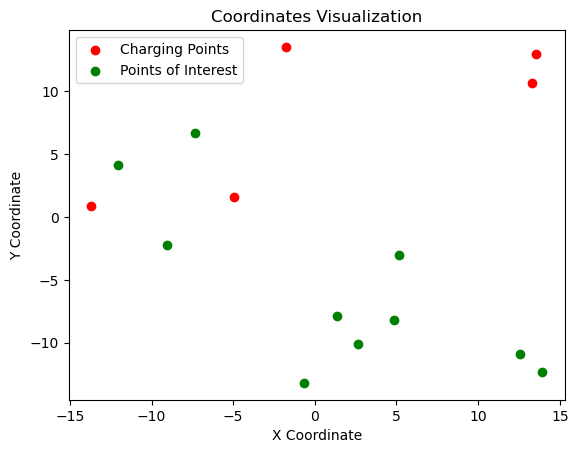

In [4]:
import matplotlib.pyplot as plt

charging_x, charging_y = zip(*existing_charging_points)
interest_x, interest_y = zip(*points_of_interest)

plt.scatter(charging_x, charging_y, color='red', label='Charging Points')
plt.scatter(interest_x, interest_y, color='green', label='Points of Interest')

plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.title('Coordinates Visualization')

plt.legend()

plt.show()

### Dividing the population into different possible grids

In [5]:
def divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, factor_power, save_grids=False, numbering=False):
    total_parts = 2 ** num_of_qubits_for_one_point

    if numbering:
        print(f"Graph #: {factor_power}")

    if num_of_qubits_for_one_point >= 3:
        factor1 = 2 ** factor_power
        factor2 = total_parts // factor1

        charging_x, charging_y = zip(*existing_charging_points)
        interest_x, interest_y = zip(*points_of_interest)

        plt.scatter(charging_x, charging_y, color='red', alpha=0.7)
        plt.scatter(interest_x, interest_y, color='green', alpha=0.7)

        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if i > 0:
                        adjacent_pairs.append((i - 1) * factor2 + j)
                    if i < factor1 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + j)
                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))
                    if i > 0 and j > 0:
                        adjacent_pairs.append((i - 1) * factor2 + (j - 1))
                    if i > 0 and j < factor2 - 1:
                        adjacent_pairs.append((i - 1) * factor2 + (j + 1))
                    if i < factor1 - 1 and j > 0:
                        adjacent_pairs.append((i + 1) * factor2 + (j - 1))
                    if i < factor1 - 1 and j < factor2 - 1:
                        adjacent_pairs.append((i + 1) * factor2 + (j + 1))

                    adjacent_pairs.sort()

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts using {factor1} x {factor2} grid')

        plt.show()

    else:
        factor1, factor2 = 1, total_parts

        plt.scatter(*zip(*all_coordinates), color='blue', alpha=0.7)

        plt.xlim(X_MIN, X_MAX)
        plt.ylim(Y_MIN, Y_MAX)

        boundaries_dict = {}

        for i in range(factor1):
            for j in range(factor2):
                x_start = X_MIN + i * (X_MAX - X_MIN) / factor1
                x_end = X_MIN + (i + 1) * (X_MAX - X_MIN) / factor1
                y_start = Y_MIN + j * (Y_MAX - Y_MIN) / factor2
                y_end = Y_MIN + (j + 1) * (Y_MAX - Y_MIN) / factor2

                if save_grids:
                    grid_number = i * factor2 + j
                    adjacent_pairs = []

                    if j > 0:
                        adjacent_pairs.append(i * factor2 + (j - 1))
                    if j < factor2 - 1:
                        adjacent_pairs.append(i * factor2 + (j + 1))

                    boundaries_dict[grid_number] = {'x_start': x_start, 'x_end': x_end, 'y_start': y_start, 'y_end': y_end, 'adjacent_pairs': adjacent_pairs}

                plt.axhline(y=y_start, color='black', linestyle='--', linewidth=0.5)
                plt.axvline(x=x_start, color='black', linestyle='--', linewidth=0.5)
                plt.annotate(f'{i * factor2 + j}', ((x_start + x_end) / 2, (y_start + y_end) / 2),
                             ha='center', va='center', fontsize=8, color='red')

        plt.xlabel('X Coordinate')
        plt.ylabel('Y Coordinate')
        plt.title(f'Divided Graph into {total_parts} Equal Parts')

        plt.show()

    return boundaries_dict


In [6]:
from prettytable import PrettyTable

def display_boundaries_table(boundaries_dict, points_counts):
    if boundaries_dict is not None:
        table = PrettyTable()
        table.field_names = ["Grid Number", "X Start", "X End", "Y Start", "Y End", "Adjacent Pairs", "Existing Charging Points", "Points of Interest"]

        for grid_number, boundary_info in boundaries_dict.items():
            charging_points = points_counts[grid_number]['charging_points']
            points_of_interest = points_counts[grid_number]['points_of_interest']
            adjacent_pairs = ', '.join(map(str, boundary_info.get('adjacent_pairs', [])))

            table.add_row([grid_number, boundary_info['x_start'], boundary_info['x_end'], boundary_info['y_start'], boundary_info['y_end'],
                           adjacent_pairs, charging_points, points_of_interest])

        print(table)
    else:
        print("No grid boundaries to display.")


def count_points_in_grids(existing_charging_points, points_of_interest, boundaries_dict):
    grid_counts = {}

    for grid_number, boundaries in boundaries_dict.items():
        x_start, x_end, y_start, y_end = boundaries['x_start'], boundaries['x_end'], boundaries['y_start'], boundaries['y_end']

        charging_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in existing_charging_points)
        interest_in_grid = sum(x_start <= x <= x_end and y_start <= y <= y_end for x, y in points_of_interest)

        grid_counts[grid_number] = {'charging_points': charging_in_grid, 'points_of_interest': interest_in_grid}

    return grid_counts


Graph #: 1


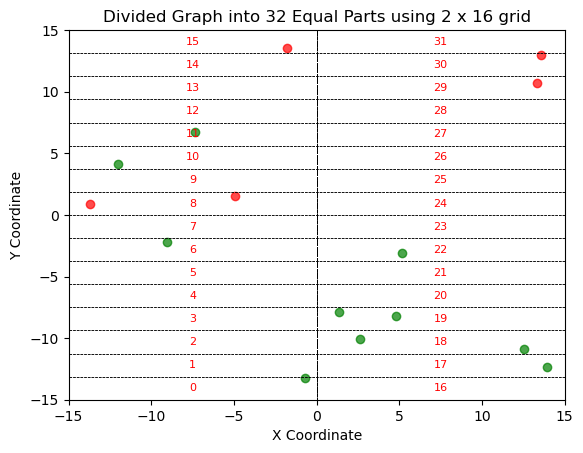

Graph #: 2


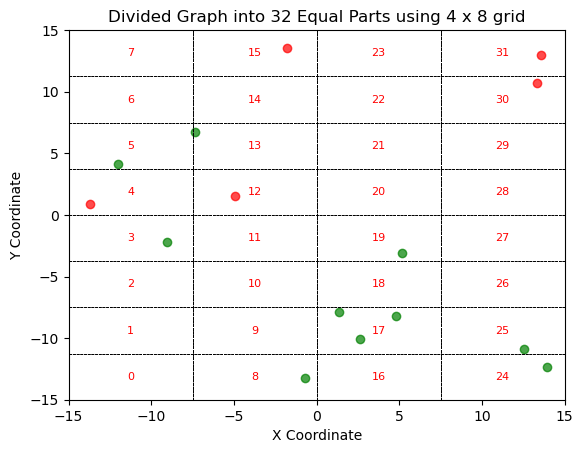

Graph #: 3


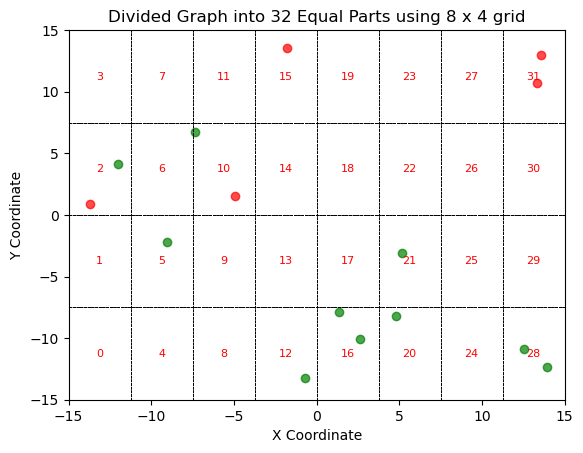

Graph #: 4


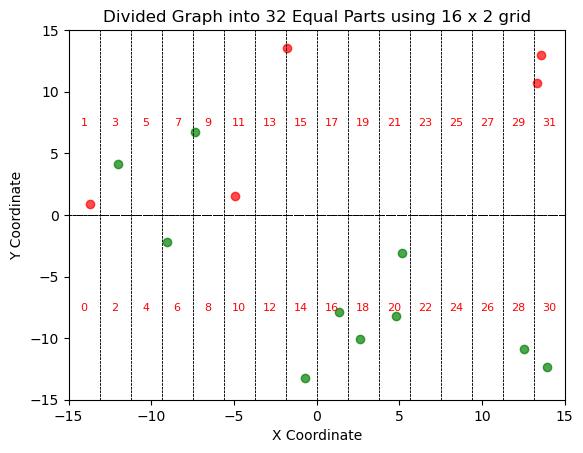

In [7]:
num_of_qubits_for_one_point = 5
for i in range(1, num_of_qubits_for_one_point):
    divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, i, numbering = True)

### Selecting the best Gird

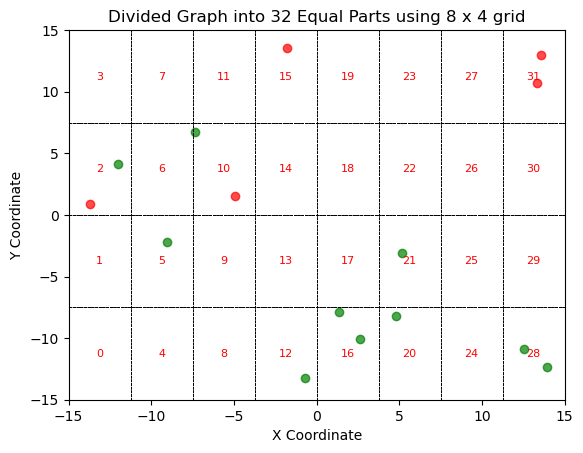

In [8]:
'''
The numbering starts from 1,2,3,..
'''
final_grid = 3

boundaries = {}

boundaries = divide_graph_into_parts(num_of_qubits_for_one_point, existing_charging_points, points_of_interest, final_grid, save_grids=True)

### Extracting useful information from thefinal plot

In [9]:
points_counts = count_points_in_grids(existing_charging_points, points_of_interest, boundaries)

display_boundaries_table(boundaries, points_counts)

+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+
| Grid Number | X Start | X End  | Y Start | Y End |         Adjacent Pairs         | Existing Charging Points | Points of Interest |
+-------------+---------+--------+---------+-------+--------------------------------+--------------------------+--------------------+
|      0      |  -15.0  | -11.25 |  -15.0  |  -7.5 |            1, 4, 5             |            0             |         0          |
|      1      |  -15.0  | -11.25 |   -7.5  |  0.0  |         0, 2, 4, 5, 6          |            0             |         0          |
|      2      |  -15.0  | -11.25 |   0.0   |  7.5  |         1, 3, 5, 6, 7          |            1             |         1          |
|      3      |  -15.0  | -11.25 |   7.5   |  15.0 |            2, 6, 7             |            0             |         0          |
|      4      |  -11.25 |  -7.5  |  -15.0  |  -7.5 |         0

In [10]:
def create_fitness_dict(boundaries_dict, points_counts):
    fitness_dict = {}

    for grid_number, boundary_info in boundaries_dict.items():
        charging_points = points_counts[grid_number]['charging_points']
        points_of_interest = points_counts[grid_number]['points_of_interest']
        adjacent_pairs = []
        for _ in boundary_info.get('adjacent_pairs'):
            adjacent_pairs.append(_)

        fitness_dict[grid_number] = {'Adjacent_Pairs': adjacent_pairs, 'Charging Points': charging_points, 'Points of Interest': points_of_interest}

    return fitness_dict

def display_fitness_table(fitness_dict):
    if fitness_dict:
        table = PrettyTable()
        table.field_names = ["Grid Number", "Adjacent Pairs", "Charging Points", "Points of Interest"]

        for grid_number, fitness_info in fitness_dict.items():
            adjacent_pairs = ', '.join(map(str, fitness_info.get('Adjacent_Pairs', [])))
            charging_points = fitness_info['Charging Points']
            points_of_interest = fitness_info['Points of Interest']

            table.add_row([grid_number, adjacent_pairs, charging_points, points_of_interest])

        print(table)
    else:
        print("Summary dictionary is empty.")

In [11]:
fitness_dict = create_fitness_dict(boundaries, points_counts)

display_fitness_table(fitness_dict)

+-------------+--------------------------------+-----------------+--------------------+
| Grid Number |         Adjacent Pairs         | Charging Points | Points of Interest |
+-------------+--------------------------------+-----------------+--------------------+
|      0      |            1, 4, 5             |        0        |         0          |
|      1      |         0, 2, 4, 5, 6          |        0        |         0          |
|      2      |         1, 3, 5, 6, 7          |        1        |         1          |
|      3      |            2, 6, 7             |        0        |         0          |
|      4      |         0, 1, 5, 8, 9          |        0        |         0          |
|      5      |    0, 1, 2, 4, 6, 8, 9, 10     |        0        |         1          |
|      6      |    1, 2, 3, 5, 7, 9, 10, 11    |        0        |         0          |
|      7      |        2, 3, 6, 10, 11         |        0        |         0          |
|      8      |        4, 5, 9, 

### Generating population

In [12]:
def no_charging_stations(population_space, fitness_dict):

    filtered_population_space = [grid_number for grid_number in population_space if fitness_dict[grid_number]['Charging Points'] == 0]

    return filtered_population_space

population_space = [i for i in range(2**num_of_qubits_for_one_point)]

filtered_population_space = no_charging_stations(population_space, fitness_dict)

print("Final population space:")
print(filtered_population_space)

Final population space:
[0, 1, 3, 4, 5, 6, 7, 8, 9, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]


In [13]:
import random

def population_generator(filtered_population_space, population_size, num_new_charging_points):
    generation = []
    for population in range(population_size):
        pop = random.sample(filtered_population_space, num_new_charging_points)
        generation.append(pop)

    return generation

Generation = population_generator(filtered_population_space, population_size, num_new_charging_points)

print(Generation)

[[23, 9, 14, 19, 4], [22, 14, 8, 17, 27], [7, 5, 28, 14, 29], [6, 22, 19, 14, 11], [7, 22, 27, 0, 13], [7, 17, 18, 21, 22], [19, 25, 17, 8, 9], [22, 9, 5, 3, 14], [6, 18, 23, 12, 13], [27, 30, 22, 14, 9], [18, 26, 16, 4, 11], [18, 20, 17, 24, 14], [17, 20, 18, 25, 14], [25, 5, 9, 28, 4], [18, 12, 4, 9, 6], [26, 21, 19, 17, 4], [3, 0, 18, 21, 5], [0, 17, 20, 21, 1], [27, 29, 22, 18, 12], [9, 27, 3, 20, 11]]


### Fitness function

In [14]:
def fitness_function(individual, fitness_dict):
    total_fitness = 0

    for grid_number in individual:
        
        charging_in_grid = fitness_dict[grid_number]['Charging Points'] > 0

        adjacent_pairs = fitness_dict[grid_number]['Adjacent_Pairs']
        charging_in_adjacent_grids = any(fitness_dict[int(adjacent_grid)]['Charging Points'] > 0 for adjacent_grid in adjacent_pairs)

        grid_fitness = 0

        if not charging_in_grid and not charging_in_adjacent_grids:
            grid_fitness = 2  # Valid
        elif not charging_in_grid or not charging_in_adjacent_grids:
            grid_fitness = 1
        
        total_fitness += grid_fitness

    return total_fitness



def select_top_population(Generation, fitness_dict):

    fitness_scores = [(individual, fitness_function(individual, fitness_dict)) for individual in Generation]

    sorted_population = sorted(fitness_scores, key=lambda x: x[1], reverse=True)

    top_population = [individual for individual, _ in sorted_population[:5]]

    return top_population




top_population = select_top_population(Generation, fitness_dict)


print("Top 5 individuals:", top_population)



Top 5 individuals: [[0, 17, 20, 21, 1], [22, 14, 8, 17, 27], [7, 17, 18, 21, 22], [19, 25, 17, 8, 9], [18, 20, 17, 24, 14]]


### Encoding

### Crossover and Mutation

### Genetic Algorithm - Iteration

### Final Results